In [36]:
import numpy as np
from sklearn import datasets, cross_validation, ensemble, tree
from matplotlib import pylab as plt

In [3]:
%matplotlib inline

In [4]:
digits = datasets.load_digits()

In [8]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [9]:
X = digits['data']
y = digits['target']

In [15]:
X.shape, y.shape

((1797, 64), (1797,))

In [40]:
tree_clf = tree.DecisionTreeClassifier()

In [41]:
tree_score = cross_validation.cross_val_score(tree_clf, X, y, scoring='accuracy', cv=10)

In [42]:
tree_score.mean()

0.8253415604704581

In [46]:
bagging_clf = ensemble.BaggingClassifier(n_estimators=100)

In [49]:
bagging_score = cross_validation.cross_val_score(bagging_clf, X, y, scoring='accuracy', cv=10, n_jobs=-1)

In [50]:
bagging_score.mean()

0.9248811229490823

In [59]:
bagg_sqrt_d_clf = ensemble.BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])))

In [60]:
bagg_sqrt_d_score = cross_validation.cross_val_score(bagg_sqrt_d_clf, X, y, scoring='accuracy', cv=10, n_jobs=-1)

In [61]:
bagg_sqrt_d_score.mean()

0.9266717710446499

In [62]:
tree_d_clf = tree.DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))

In [63]:
bag_tree_d_clf = ensemble.BaggingClassifier(base_estimator=tree_d_clf, n_estimators=100)

In [64]:
bagg_tree_d_score = cross_validation.cross_val_score(bag_tree_d_clf, X, y, scoring='accuracy', cv=10, n_jobs=-1)

In [65]:
bagg_tree_d_score.mean()

0.9505131351944991

In [66]:
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)

In [67]:
rf_score = cross_validation.cross_val_score(rf_clf, X, y, scoring='accuracy', cv=10, n_jobs=-1)

In [68]:
rf_score.mean()

0.953314875798724

In [85]:
def scorer(n, features, depth, data, target):
    scores = []
    for i in n:
        clf = ensemble.RandomForestClassifier(n_estimators=i, max_features=features, max_depth=depth)
        score = cross_validation.cross_val_score(clf, data, target, scoring='accuracy', cv=10, n_jobs=-1)
        scores.append(score.mean())
    print(scores)
    print(n)
    plt.grid(True)
    plt.plot(n, scores)

[0.8753409061125458, 0.9181827329482136, 0.9304984470123557, 0.9504314546878223, 0.95116511120181]
[5, 10, 15, 50, 100]


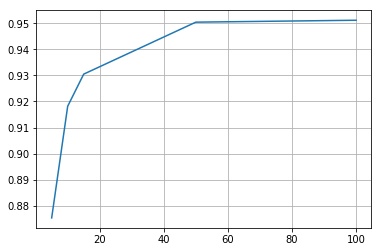

In [89]:
scorer([5, 10, 15, 50, 100], 'auto', None, X, y)

[0.8503835411718887, 0.8886262567419723, 0.9036530608495935, 0.9281055580587605, 0.9270660684126197]
[5, 10, 15, 50, 100]


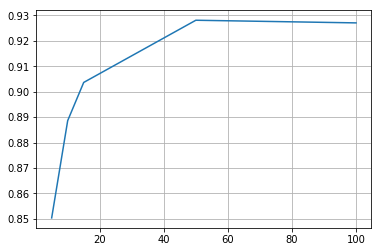

In [90]:
scorer([5, 10, 15, 50, 100], 'auto', 6, X, y)